In [476]:
import numpy as np
from scipy.linalg import svd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

## Generate bivariate data with a few Gaussians of Different Means and Covariance

/Users/brianxia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/brianxia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


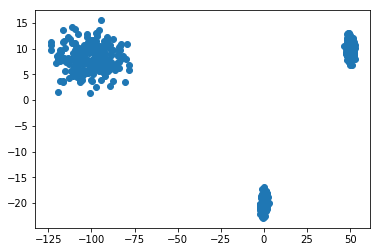

In [524]:
mean1 = [0, -20]
cov1 = [[1,0.5], [0,1]]
g1 = np.random.multivariate_normal(mean1, cov1, 250)
mean2 = [50, 10]
cov2 = [[1,0],[0,1]]
g2 = np.random.multivariate_normal(mean2, cov2, 250)
mean3 = [-100, 8]
cov3 = [[100,1.5],[1,6]]
g3 = np.random.multivariate_normal(mean3, cov3, 250)
mean4 = [-25, -10]
cov4 = [[5,0.5], [0,1]]
g4 = np.random.multivariate_normal(mean4, cov4, 250)
data = np.vstack((np.vstack((np.vstack((g1, g2)), g3)), g4))
plt.scatter(data[:,0], data[:,1])

## A Fully Vectorized Vanilla Kmean for Bivariate Data
#### Implemented as a baseline to compare with the tensor method

('...', 0, '...', 114.51694739850642)
('...', 1, '...', 0.0)
('...', 2, '...', 0.0)
('...', 3, '...', 0.0)
('...', 4, '...', 0.0)


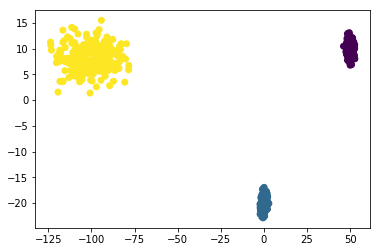

In [525]:
def bivariate_kmean(k, data, tolerance, iteration):
    means = (np.random.rand(k, 2) - 0.5)
    tol = float('inf')
    count = 0
    while (tol > tolerance and count < iteration) or count < 5:
        assignments = np.power(np.power(data - means[:,None], 2).sum(axis=2), 0.5).argmin(axis=0)
        mask = assignments == np.linspace(0,k-1,k)[:,None]
        new_means = (data * mask[...,None]).sum(axis=1) / (mask.sum(axis=1)[...,None] + 0.0001)
        tol = (((means - new_means)**2).sum())**.5
        means = new_means
        print ("...", count, "...", tol)
        count += 1
    return means, assignments

k = 4
means, assignments = bivariate_kmean(k, data, 0.000001, 100)

plt.scatter(data[:,0], data[:,1], c=assignments)

## Applying PCA to Data
#### Reduce data to one dimension and plot to visualize data projections

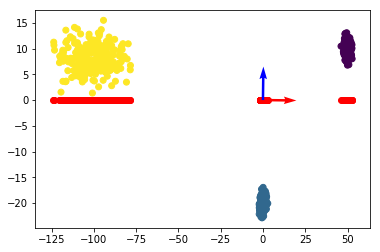

In [526]:
cov = np.cov(data.T)
w, v = np.linalg.eig(cov)
transformed_data = np.dot(data, v[0])

plt.scatter(data[:,0], data[:,1], c=assignments)
plt.scatter(transformed_data, [0]*data.shape[0], color='r')
plt.quiver([0,0], [0,0], v[:,0], v[:,1], color=['red','blue'], scale=10)

## Applying Tensor Decomposition
#### Instead of the covariance matrix, use the Square of Distance Matrix

In [535]:
distance_matrix = -(euclidean_distances(data, data)**2)
# val, vec = np.linalg.eig(distance_matrix)
U, s, VT = svd(distance_matrix)

In [536]:
print(np.abs(s[:10]))

[9.05863024e+06 8.27630896e+06 7.55916230e+05 2.64050458e+04
 1.92629609e-08 1.33450330e-08 1.11327497e-08 7.08380945e-09
 6.46179222e-09 5.11632298e-09]


0
294
448
258


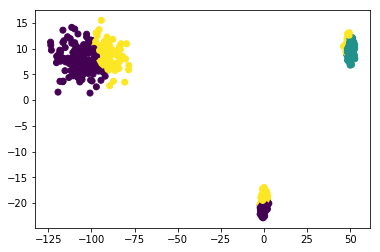

In [538]:
k = 4
cluster = np.argmax(VT[:k], axis=0)
for i in range(k):
    print((cluster == i).sum())
plt.scatter(data[:,0], data[:,1], c=cluster)